In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2012-2025.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2012-2025.csv', encoding='cp949')

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [5]:
# Load Chl-a, WT data
SC_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a, WT_seungchon_2012-2025.csv', encoding='cp949')
JS_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a, WT_juksan_2012-2025.csv', encoding='cp949')

In [6]:
SC_Chla.dropna(inplace=True)
JS_Chla.dropna(inplace=True)

In [7]:
print(SC_Chla.shape)
SC_Chla

(693, 30)


,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2012.03.30,104.0,14.8,90.3,25.4,4.1,25.4,5.9,66.6,6.1,...,34.2,6.6,63.1,10.5,43.6,9.6,67.4,10.3,104.0,14.8
13,2012.04.02,90.3,12.8,151.1,25.4,5.9,66.6,6.1,75.5,4.3,...,63.1,10.5,43.6,9.6,67.4,10.3,104.0,14.8,90.3,12.8
14,2012.04.10,151.1,15.1,74.1,66.6,6.1,75.5,4.3,54.4,5.9,...,43.6,9.6,67.4,10.3,104.0,14.8,90.3,12.8,151.1,15.1
15,2012.04.18,74.1,19.2,61.3,75.5,4.3,54.4,5.9,40.4,4.7,...,67.4,10.3,104.0,14.8,90.3,12.8,151.1,15.1,74.1,19.2
16,2012.04.26,61.3,17.2,70.9,54.4,5.9,40.4,4.7,83.7,6.6,...,104.0,14.8,90.3,12.8,151.1,15.1,74.1,19.2,61.3,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,2025.11.17,79.5,14.2,50.6,47.1,29.1,64.5,30.7,21.9,28.1,...,6.3,19.9,15.0,18.8,40.2,15.8,46.6,16.7,79.5,14.2
701,2025.11.24,50.6,12.3,38.8,64.5,30.7,21.9,28.1,3.4,25.9,...,15.0,18.8,40.2,15.8,46.6,16.7,79.5,14.2,50.6,12.3
702,2025.12.01,38.8,11.8,52.4,21.9,28.1,3.4,25.9,3.6,25.4,...,40.2,15.8,46.6,16.7,79.5,14.2,50.6,12.3,38.8,11.8
703,2025.12.08,52.4,9.4,44.8,3.4,25.9,3.6,25.4,9.2,24.8,...,46.6,16.7,79.5,14.2,50.6,12.3,38.8,11.8,52.4,9.4


In [8]:
print(JS_Chla.shape)
JS_Chla

(695, 30)


,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2012.03.26,82.5,8.8,59.1,55.4,3.0,62.0,3.7,135.1,5.9,...,38.4,5.4,70.1,8.4,129.2,9.4,105.3,8.8,82.5,8.8
13,2012.04.04,59.1,11.2,117.8,62.0,3.7,135.1,5.9,113.2,3.1,...,70.1,8.4,129.2,9.4,105.3,8.8,82.5,8.8,59.1,11.2
14,2012.04.12,117.8,13.5,21.1,135.1,5.9,113.2,3.1,79.0,4.0,...,129.2,9.4,105.3,8.8,82.5,8.8,59.1,11.2,117.8,13.5
15,2012.04.16,21.1,14.7,19.0,113.2,3.1,79.0,4.0,75.1,2.8,...,105.3,8.8,82.5,8.8,59.1,11.2,117.8,13.5,21.1,14.7
16,2012.04.26,19.0,16.3,21.3,79.0,4.0,75.1,2.8,60.6,3.7,...,82.5,8.8,59.1,11.2,117.8,13.5,21.1,14.7,19.0,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2025.11.17,18.5,13.9,15.7,68.5,29.6,46.5,31.1,48.2,30.2,...,6.4,20.6,61.0,18.1,119.6,15.7,59.5,15.6,18.5,13.9
703,2025.11.24,15.7,11.7,13.7,46.5,31.1,48.2,30.2,8.3,27.0,...,61.0,18.1,119.6,15.7,59.5,15.6,18.5,13.9,15.7,11.7
704,2025.12.01,13.7,11.2,16.6,48.2,30.2,8.3,27.0,4.4,25.3,...,119.6,15.7,59.5,15.6,18.5,13.9,15.7,11.7,13.7,11.2
705,2025.12.08,16.6,9.0,16.4,8.3,27.0,4.4,25.3,12.4,24.8,...,59.5,15.6,18.5,13.9,15.7,11.7,13.7,11.2,16.6,9.0


In [9]:
# SC (train vs test)
train_SC = SC_Chla[SC_Chla.index < 656]
test_SC = SC_Chla[SC_Chla.index >= 656]

In [10]:
train_SC

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2012.03.30,104.0,14.8,90.3,25.4,4.1,25.4,5.9,66.6,6.1,...,34.2,6.6,63.1,10.5,43.6,9.6,67.4,10.3,104.0,14.8
13,2012.04.02,90.3,12.8,151.1,25.4,5.9,66.6,6.1,75.5,4.3,...,63.1,10.5,43.6,9.6,67.4,10.3,104.0,14.8,90.3,12.8
14,2012.04.10,151.1,15.1,74.1,66.6,6.1,75.5,4.3,54.4,5.9,...,43.6,9.6,67.4,10.3,104.0,14.8,90.3,12.8,151.1,15.1
15,2012.04.18,74.1,19.2,61.3,75.5,4.3,54.4,5.9,40.4,4.7,...,67.4,10.3,104.0,14.8,90.3,12.8,151.1,15.1,74.1,19.2
16,2012.04.26,61.3,17.2,70.9,54.4,5.9,40.4,4.7,83.7,6.6,...,104.0,14.8,90.3,12.8,151.1,15.1,74.1,19.2,61.3,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2024.11.25,32.8,12.9,14.0,35.9,29.2,20.7,28.8,20.4,30.0,...,13.1,18.7,7.8,18.7,14.3,16.2,42.7,15.1,32.8,12.9
652,2024.12.02,14.0,10.2,32.0,20.7,28.8,20.4,30.0,1.7,24.3,...,7.8,18.7,14.3,16.2,42.7,15.1,32.8,12.9,14.0,10.2
653,2024.12.09,32.0,9.4,21.2,20.4,30.0,1.7,24.3,53.5,23.8,...,14.3,16.2,42.7,15.1,32.8,12.9,14.0,10.2,32.0,9.4
654,2024.12.16,21.2,8.2,17.2,1.7,24.3,53.5,23.8,74.6,21.3,...,42.7,15.1,32.8,12.9,14.0,10.2,32.0,9.4,21.2,8.2


In [11]:
test_SC

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
656,2025.01.02,20.7,8.1,28.8,74.6,21.3,40.3,21.9,17.8,21.1,...,14.0,10.2,32.0,9.4,21.2,8.2,17.2,6.8,20.7,8.1
657,2025.01.06,28.8,7.7,19.0,40.3,21.9,17.8,21.1,13.1,18.7,...,32.0,9.4,21.2,8.2,17.2,6.8,20.7,8.1,28.8,7.7
658,2025.01.13,19.0,5.6,26.6,17.8,21.1,13.1,18.7,7.8,18.7,...,21.2,8.2,17.2,6.8,20.7,8.1,28.8,7.7,19.0,5.6
659,2025.01.20,26.6,7.1,31.6,13.1,18.7,7.8,18.7,14.3,16.2,...,17.2,6.8,20.7,8.1,28.8,7.7,19.0,5.6,26.6,7.1
660,2025.02.03,31.6,6.7,25.5,7.8,18.7,14.3,16.2,42.7,15.1,...,20.7,8.1,28.8,7.7,19.0,5.6,26.6,7.1,31.6,6.7
661,2025.02.11,25.5,5.3,19.3,14.3,16.2,42.7,15.1,32.8,12.9,...,28.8,7.7,19.0,5.6,26.6,7.1,31.6,6.7,25.5,5.3
662,2025.02.17,19.3,6.6,35.3,42.7,15.1,32.8,12.9,14.0,10.2,...,19.0,5.6,26.6,7.1,31.6,6.7,25.5,5.3,19.3,6.6
663,2025.02.24,35.3,6.5,40.9,32.8,12.9,14.0,10.2,32.0,9.4,...,26.6,7.1,31.6,6.7,25.5,5.3,19.3,6.6,35.3,6.5
664,2025.03.05,40.9,9.8,59.1,14.0,10.2,32.0,9.4,21.2,8.2,...,31.6,6.7,25.5,5.3,19.3,6.6,35.3,6.5,40.9,9.8
665,2025.03.10,59.1,10.4,55.6,32.0,9.4,21.2,8.2,17.2,6.8,...,25.5,5.3,19.3,6.6,35.3,6.5,40.9,9.8,59.1,10.4


In [15]:
# JS (train vs test)
train_JS = JS_Chla[JS_Chla.index < 658]
test_JS = JS_Chla[JS_Chla.index >= 658]

In [16]:
train_JS

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2012.03.26,82.5,8.8,59.1,55.4,3.0,62.0,3.7,135.1,5.9,...,38.4,5.4,70.1,8.4,129.2,9.4,105.3,8.8,82.5,8.8
13,2012.04.04,59.1,11.2,117.8,62.0,3.7,135.1,5.9,113.2,3.1,...,70.1,8.4,129.2,9.4,105.3,8.8,82.5,8.8,59.1,11.2
14,2012.04.12,117.8,13.5,21.1,135.1,5.9,113.2,3.1,79.0,4.0,...,129.2,9.4,105.3,8.8,82.5,8.8,59.1,11.2,117.8,13.5
15,2012.04.16,21.1,14.7,19.0,113.2,3.1,79.0,4.0,75.1,2.8,...,105.3,8.8,82.5,8.8,59.1,11.2,117.8,13.5,21.1,14.7
16,2012.04.26,19.0,16.3,21.3,79.0,4.0,75.1,2.8,60.6,3.7,...,82.5,8.8,59.1,11.2,117.8,13.5,21.1,14.7,19.0,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,2024.11.25,18.0,13.0,20.6,64.1,29.4,49.3,28.7,44.2,30.2,...,24.3,17.9,26.4,18.3,43.6,15.6,20.8,14.2,18.0,13.0
654,2024.12.02,20.6,10.5,55.3,49.3,28.7,44.2,30.2,2.3,24.0,...,26.4,18.3,43.6,15.6,20.8,14.2,18.0,13.0,20.6,10.5
655,2024.12.09,55.3,8.2,66.4,44.2,30.2,2.3,24.0,53.1,24.4,...,43.6,15.6,20.8,14.2,18.0,13.0,20.6,10.5,55.3,8.2
656,2024.12.16,66.4,6.8,62.4,2.3,24.0,53.1,24.4,34.9,21.5,...,20.8,14.2,18.0,13.0,20.6,10.5,55.3,8.2,66.4,6.8


In [17]:
test_JS

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
658,2025.01.02,59.3,5.4,83.0,34.9,21.5,59.6,21.3,19.6,20.5,...,20.6,10.5,55.3,8.2,66.4,6.8,62.4,5.4,59.3,5.4
659,2025.01.06,83.0,5.5,110.5,59.6,21.3,19.6,20.5,24.3,17.9,...,55.3,8.2,66.4,6.8,62.4,5.4,59.3,5.4,83.0,5.5
660,2025.01.13,110.5,4.2,90.3,19.6,20.5,24.3,17.9,26.4,18.3,...,66.4,6.8,62.4,5.4,59.3,5.4,83.0,5.5,110.5,4.2
661,2025.01.20,90.3,4.6,113.0,24.3,17.9,26.4,18.3,43.6,15.6,...,62.4,5.4,59.3,5.4,83.0,5.5,110.5,4.2,90.3,4.6
662,2025.02.03,113.0,5.4,106.8,26.4,18.3,43.6,15.6,20.8,14.2,...,59.3,5.4,83.0,5.5,110.5,4.2,90.3,4.6,113.0,5.4
663,2025.02.11,106.8,4.2,117.3,43.6,15.6,20.8,14.2,18.0,13.0,...,83.0,5.5,110.5,4.2,90.3,4.6,113.0,5.4,106.8,4.2
664,2025.02.17,117.3,5.4,139.3,20.8,14.2,18.0,13.0,20.6,10.5,...,110.5,4.2,90.3,4.6,113.0,5.4,106.8,4.2,117.3,5.4
665,2025.02.24,139.3,5.5,79.2,18.0,13.0,20.6,10.5,55.3,8.2,...,90.3,4.6,113.0,5.4,106.8,4.2,117.3,5.4,139.3,5.5
666,2025.03.05,79.2,8.8,113.3,20.6,10.5,55.3,8.2,66.4,6.8,...,113.0,5.4,106.8,4.2,117.3,5.4,139.3,5.5,79.2,8.8
667,2025.03.10,113.3,10.1,103.4,55.3,8.2,66.4,6.8,62.4,5.4,...,106.8,4.2,117.3,5.4,139.3,5.5,79.2,8.8,113.3,10.1


In [18]:
# train vs test
X_train_SC = train_SC.loc[:, 'Chla_t-12':'WT_t-0']
y_train_SC = train_SC['y_t+1']

X_test_SC = test_SC.loc[:, 'Chla_t-12':'WT_t-0']
y_test_SC = test_SC['y_t+1']

X_train_JS = train_JS.loc[:, 'Chla_t-12':'WT_t-0']
y_train_JS = train_JS['y_t+1']

X_test_JS = test_JS.loc[:, 'Chla_t-12':'WT_t-0']
y_test_JS = test_JS['y_t+1']

print(X_train_SC.shape, y_train_SC.shape)
print(X_test_SC.shape, y_test_SC.shape)
print(X_train_JS.shape, y_train_JS.shape)
print(X_test_JS.shape, y_test_JS.shape)

(644, 26) (644,)
(49, 26) (49,)
(646, 26) (646,)
(49, 26) (49,)


In [19]:
# 이 셀을 두 번 실행시키면 values가 없다고 뜬다. 그럴 때는 위부터 다시 실행하고 오면 된다.
# 총 13번의 순환 동안 2개씩 입력이 들어가게 된다.
X_train_SC = X_train_SC.values.reshape(644,13,2)
X_test_SC = X_test_SC.values.reshape(49,13,2)
X_train_JS = X_train_JS.values.reshape(646,13,2)
X_test_JS = X_test_JS.values.reshape(49,13,2)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# RNN

In [21]:
# RNN model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
17/17 - 2s - loss: 2553.2585 - mean_squared_error: 2553.2585 - mean_absolute_error: 36.8519 - val_loss: 647.7325 - val_mean_squared_error: 647.7325 - val_mean_absolute_error: 21.0376 - 2s/epoch - 140ms/step
Epoch 2/100
17/17 - 1s - loss: 1703.0436 - mean_squared_error: 1703.0436 - mean_absolute_error: 30.2569 - val_loss: 640.7106 - val_mean_squared_error: 640.7106 - val_mean_absolute_error: 21.8489 - 1s/epoch - 84ms/step
Epoch 3/100
17/17 - 1s - loss: 1498.0018 - mean_squared_error: 1498.0018 - mean_absolute_error: 28.9420 - val_loss: 701.8171 - val_mean_squared_error: 701.8171 - val_mean_absolute_error: 22.7746 - 1s/epoch - 78ms/step
Epoch 4/100
17/17 - 1s - loss: 1401.4023 - mean_squared_error: 1401.4023 - mean_absolute_error: 28.3411 - val_loss: 680.4738 - val_mean_squared_error: 680.4738 - val_mean_absolute_error: 22.5792 - 1s/epoch - 72ms/step
Epoch 5/100
17/17 - 1s - loss: 1334.8057 - mean_squared_error: 1334.8057 - mean_absolute_error: 27.0597 - val_loss: 710.5680 - 

Epoch 39/100
17/17 - 1s - loss: 1154.5587 - mean_squared_error: 1154.5587 - mean_absolute_error: 25.3400 - val_loss: 645.1488 - val_mean_squared_error: 645.1488 - val_mean_absolute_error: 21.8055 - 1s/epoch - 72ms/step
Epoch 40/100
17/17 - 1s - loss: 1125.6368 - mean_squared_error: 1125.6368 - mean_absolute_error: 25.1693 - val_loss: 590.9625 - val_mean_squared_error: 590.9625 - val_mean_absolute_error: 20.5128 - 1s/epoch - 71ms/step
Epoch 41/100
17/17 - 1s - loss: 1117.9595 - mean_squared_error: 1117.9595 - mean_absolute_error: 25.2727 - val_loss: 556.5485 - val_mean_squared_error: 556.5485 - val_mean_absolute_error: 19.4536 - 1s/epoch - 83ms/step
Epoch 42/100
17/17 - 1s - loss: 1162.7148 - mean_squared_error: 1162.7148 - mean_absolute_error: 25.4071 - val_loss: 668.5131 - val_mean_squared_error: 668.5131 - val_mean_absolute_error: 22.3078 - 1s/epoch - 87ms/step
Epoch 43/100
17/17 - 1s - loss: 1127.4580 - mean_squared_error: 1127.4580 - mean_absolute_error: 25.4590 - val_loss: 605.614

Epoch 77/100
17/17 - 1s - loss: 1089.5040 - mean_squared_error: 1089.5040 - mean_absolute_error: 24.9725 - val_loss: 624.1801 - val_mean_squared_error: 624.1801 - val_mean_absolute_error: 21.0921 - 1s/epoch - 83ms/step
Epoch 78/100
17/17 - 1s - loss: 1099.7316 - mean_squared_error: 1099.7316 - mean_absolute_error: 24.8373 - val_loss: 649.1348 - val_mean_squared_error: 649.1348 - val_mean_absolute_error: 21.7620 - 1s/epoch - 86ms/step
Epoch 79/100
17/17 - 1s - loss: 1113.2081 - mean_squared_error: 1113.2081 - mean_absolute_error: 25.0354 - val_loss: 600.5999 - val_mean_squared_error: 600.5999 - val_mean_absolute_error: 20.6915 - 1s/epoch - 77ms/step
Epoch 80/100
17/17 - 1s - loss: 1103.8042 - mean_squared_error: 1103.8042 - mean_absolute_error: 24.8662 - val_loss: 618.2414 - val_mean_squared_error: 618.2414 - val_mean_absolute_error: 21.0617 - 1s/epoch - 73ms/step
Epoch 81/100
17/17 - 1s - loss: 1105.8175 - mean_squared_error: 1105.8175 - mean_absolute_error: 24.6949 - val_loss: 636.556

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 1052673 (4.02 MB)
Trainable params: 1052673 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 13ms/step - loss: 630.8798 - mean_squared_error: 630.8798 - mean_absolute_error: 20.7453
test_loss:  630.8797607421875
test_mae:  630.8797607421875


In [24]:
SC_test_y_pred_RNN = model.predict(X_test_SC)
SC_test_y_pred_RNN

2/2 [==============================] - 0s 14ms/step


array([[37.778393],
       [44.955154],
       [38.66878 ],
       [43.216625],
       [48.38593 ],
       [45.357544],
       [41.81272 ],
       [49.374928],
       [51.618   ],
       [58.40334 ],
       [57.968815],
       [66.939224],
       [74.83245 ],
       [47.36105 ],
       [44.446163],
       [55.54816 ],
       [52.520645],
       [50.843475],
       [47.74957 ],
       [50.285603],
       [59.762383],
       [60.324528],
       [57.072987],
       [38.91502 ],
       [31.081024],
       [58.243103],
       [51.04927 ],
       [48.298695],
       [35.986526],
       [57.827267],
       [37.7711  ],
       [29.312756],
       [51.043552],
       [58.385822],
       [47.086514],
       [32.538647],
       [28.21079 ],
       [29.459856],
       [24.671144],
       [34.361294],
       [24.918243],
       [32.27494 ],
       [49.449024],
       [53.60144 ],
       [64.15148 ],
       [57.23828 ],
       [51.836666],
       [55.79823 ],
       [53.595997]], dtype=float32)

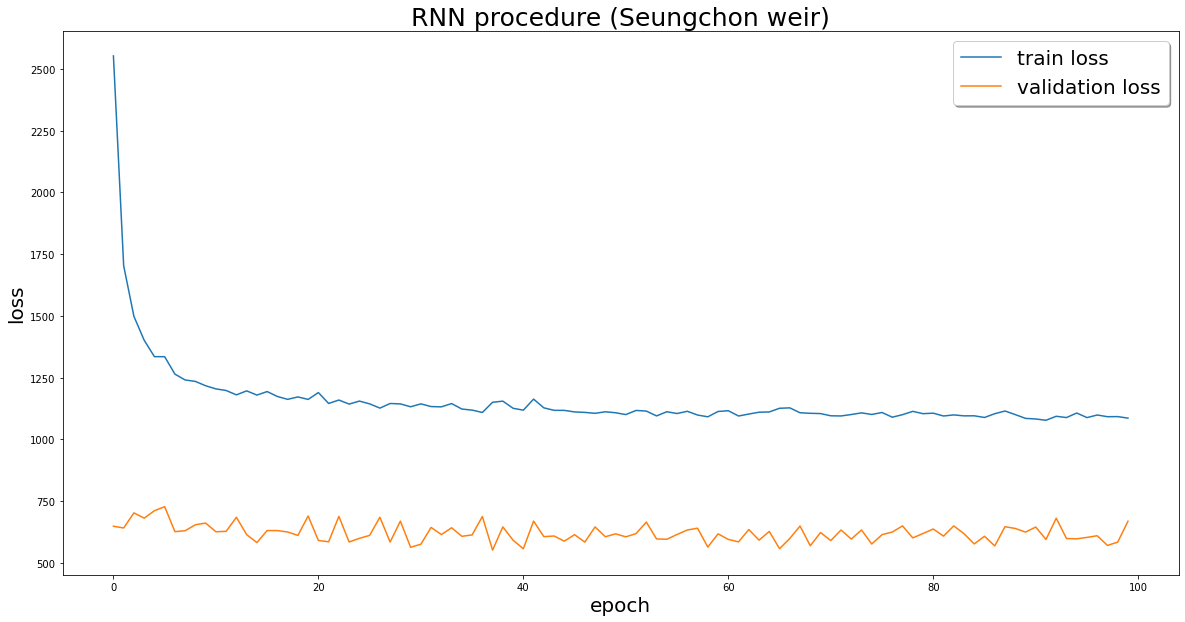

In [25]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN SC_python.png')

In [26]:
# RNN model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
17/17 - 2s - loss: 2246.4329 - mean_squared_error: 2246.4329 - mean_absolute_error: 32.4840 - val_loss: 418.3153 - val_mean_squared_error: 418.3153 - val_mean_absolute_error: 16.1751 - 2s/epoch - 138ms/step
Epoch 2/100
17/17 - 1s - loss: 1555.5636 - mean_squared_error: 1555.5636 - mean_absolute_error: 26.9338 - val_loss: 502.2863 - val_mean_squared_error: 502.2863 - val_mean_absolute_error: 19.0303 - 1s/epoch - 84ms/step
Epoch 3/100
17/17 - 1s - loss: 1444.1895 - mean_squared_error: 1444.1895 - mean_absolute_error: 26.9407 - val_loss: 604.8670 - val_mean_squared_error: 604.8670 - val_mean_absolute_error: 21.1939 - 1s/epoch - 76ms/step
Epoch 4/100
17/17 - 1s - loss: 1411.4342 - mean_squared_error: 1411.4342 - mean_absolute_error: 27.1271 - val_loss: 606.2255 - val_mean_squared_error: 606.2255 - val_mean_absolute_error: 21.2433 - 1s/epoch - 85ms/step
Epoch 5/100
17/17 - 1s - loss: 1373.7699 - mean_squared_error: 1373.7699 - mean_absolute_error: 26.7388 - val_loss: 548.4960 - 

Epoch 39/100
17/17 - 1s - loss: 893.0626 - mean_squared_error: 893.0626 - mean_absolute_error: 22.5449 - val_loss: 415.7021 - val_mean_squared_error: 415.7021 - val_mean_absolute_error: 15.7629 - 1s/epoch - 78ms/step
Epoch 40/100
17/17 - 1s - loss: 909.0484 - mean_squared_error: 909.0484 - mean_absolute_error: 22.4261 - val_loss: 494.9222 - val_mean_squared_error: 494.9222 - val_mean_absolute_error: 17.5666 - 1s/epoch - 85ms/step
Epoch 41/100
17/17 - 1s - loss: 888.2971 - mean_squared_error: 888.2971 - mean_absolute_error: 22.2198 - val_loss: 563.5527 - val_mean_squared_error: 563.5527 - val_mean_absolute_error: 18.2625 - 1s/epoch - 82ms/step
Epoch 42/100
17/17 - 1s - loss: 924.2064 - mean_squared_error: 924.2064 - mean_absolute_error: 23.0631 - val_loss: 474.4619 - val_mean_squared_error: 474.4619 - val_mean_absolute_error: 16.6176 - 1s/epoch - 75ms/step
Epoch 43/100
17/17 - 1s - loss: 946.6316 - mean_squared_error: 946.6316 - mean_absolute_error: 23.7793 - val_loss: 422.2952 - val_me

Epoch 77/100
17/17 - 1s - loss: 852.7703 - mean_squared_error: 852.7703 - mean_absolute_error: 22.1118 - val_loss: 478.5240 - val_mean_squared_error: 478.5240 - val_mean_absolute_error: 16.7370 - 1s/epoch - 74ms/step
Epoch 78/100
17/17 - 1s - loss: 856.2683 - mean_squared_error: 856.2683 - mean_absolute_error: 22.1057 - val_loss: 497.8972 - val_mean_squared_error: 497.8972 - val_mean_absolute_error: 17.4422 - 1s/epoch - 76ms/step
Epoch 79/100
17/17 - 1s - loss: 862.6340 - mean_squared_error: 862.6340 - mean_absolute_error: 22.1727 - val_loss: 420.9651 - val_mean_squared_error: 420.9651 - val_mean_absolute_error: 15.7304 - 1s/epoch - 80ms/step
Epoch 80/100
17/17 - 1s - loss: 828.6886 - mean_squared_error: 828.6886 - mean_absolute_error: 21.5049 - val_loss: 609.4009 - val_mean_squared_error: 609.4009 - val_mean_absolute_error: 19.5843 - 1s/epoch - 82ms/step
Epoch 81/100
17/17 - 1s - loss: 884.0004 - mean_squared_error: 884.0004 - mean_absolute_error: 23.0811 - val_loss: 415.7311 - val_me

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1024)              1051648   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1052673 (4.02 MB)
Trainable params: 1052673 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 12ms/step - loss: 738.0758 - mean_squared_error: 738.0758 - mean_absolute_error: 22.5326
test_loss:  738.0758056640625
test_mae:  738.0758056640625


In [29]:
JS_test_y_pred_RNN = model.predict(X_test_JS)
JS_test_y_pred_RNN

2/2 [==============================] - 0s 15ms/step


array([[ 63.415283],
       [ 66.25975 ],
       [ 87.39101 ],
       [ 93.90846 ],
       [ 98.78197 ],
       [ 94.386505],
       [ 94.04681 ],
       [106.30434 ],
       [ 85.57085 ],
       [ 80.69592 ],
       [ 79.731   ],
       [ 50.6707  ],
       [ 40.379402],
       [ 61.865   ],
       [ 86.668465],
       [ 75.518234],
       [ 61.31445 ],
       [ 39.271805],
       [ 31.375439],
       [ 30.92405 ],
       [ 33.646942],
       [ 34.37953 ],
       [ 32.938087],
       [ 29.870815],
       [ 29.193333],
       [ 33.56785 ],
       [ 31.695658],
       [ 30.440384],
       [ 28.994581],
       [ 32.955704],
       [ 29.510323],
       [ 29.060356],
       [ 42.015877],
       [ 38.789597],
       [ 34.70652 ],
       [ 29.742535],
       [ 29.030039],
       [ 29.35508 ],
       [ 29.783684],
       [ 39.20819 ],
       [ 31.130152],
       [ 41.949596],
       [ 80.915955],
       [ 74.24411 ],
       [ 41.190525],
       [ 30.581497],
       [ 30.137375],
       [ 30.6

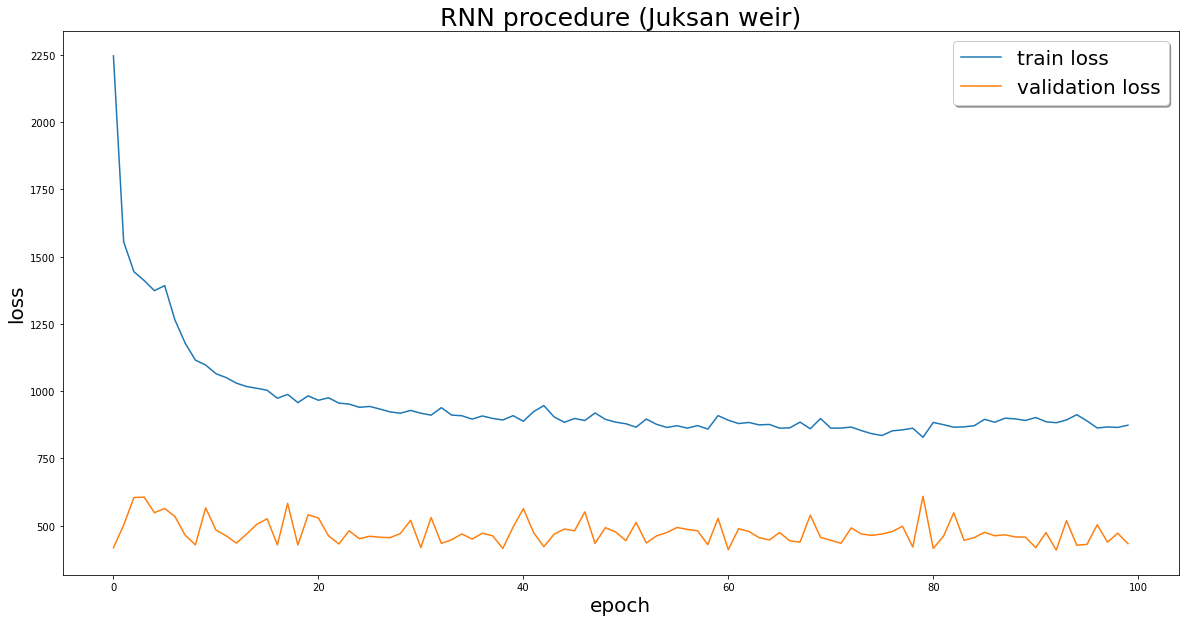

In [30]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN JS_python.png')

# LSTM

In [31]:
# LSTM model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
17/17 - 7s - loss: 2625.1899 - mean_squared_error: 2625.1899 - mean_absolute_error: 37.2976 - val_loss: 665.8055 - val_mean_squared_error: 665.8055 - val_mean_absolute_error: 21.1392 - 7s/epoch - 435ms/step
Epoch 2/100
17/17 - 5s - loss: 1725.4376 - mean_squared_error: 1725.4376 - mean_absolute_error: 30.5458 - val_loss: 670.1404 - val_mean_squared_error: 670.1404 - val_mean_absolute_error: 22.2981 - 5s/epoch - 317ms/step
Epoch 3/100
17/17 - 6s - loss: 1540.6840 - mean_squared_error: 1540.6840 - mean_absolute_error: 29.4983 - val_loss: 795.6420 - val_mean_squared_error: 795.6420 - val_mean_absolute_error: 24.0242 - 6s/epoch - 326ms/step
Epoch 4/100
17/17 - 5s - loss: 1476.1580 - mean_squared_error: 1476.1580 - mean_absolute_error: 29.3505 - val_loss: 843.9270 - val_mean_squared_error: 843.9270 - val_mean_absolute_error: 24.6469 - 5s/epoch - 310ms/step
Epoch 5/100
17/17 - 5s - loss: 1468.4622 - mean_squared_error: 1468.4622 - mean_absolute_error: 29.4032 - val_loss: 866.7736

Epoch 39/100
17/17 - 5s - loss: 1073.7664 - mean_squared_error: 1073.7664 - mean_absolute_error: 24.7449 - val_loss: 569.8937 - val_mean_squared_error: 569.8937 - val_mean_absolute_error: 20.0876 - 5s/epoch - 316ms/step
Epoch 40/100
17/17 - 5s - loss: 1064.1167 - mean_squared_error: 1064.1167 - mean_absolute_error: 24.6968 - val_loss: 531.9196 - val_mean_squared_error: 531.9196 - val_mean_absolute_error: 18.7878 - 5s/epoch - 305ms/step
Epoch 41/100
17/17 - 5s - loss: 1050.2725 - mean_squared_error: 1050.2725 - mean_absolute_error: 24.1573 - val_loss: 583.2471 - val_mean_squared_error: 583.2471 - val_mean_absolute_error: 19.9124 - 5s/epoch - 307ms/step
Epoch 42/100
17/17 - 5s - loss: 1023.1478 - mean_squared_error: 1023.1478 - mean_absolute_error: 23.8339 - val_loss: 576.0098 - val_mean_squared_error: 576.0098 - val_mean_absolute_error: 19.6346 - 5s/epoch - 309ms/step
Epoch 43/100
17/17 - 5s - loss: 1046.5541 - mean_squared_error: 1046.5541 - mean_absolute_error: 24.3425 - val_loss: 543

Epoch 77/100
17/17 - 5s - loss: 848.2201 - mean_squared_error: 848.2201 - mean_absolute_error: 21.5660 - val_loss: 571.2913 - val_mean_squared_error: 571.2913 - val_mean_absolute_error: 18.6461 - 5s/epoch - 311ms/step
Epoch 78/100
17/17 - 6s - loss: 822.0966 - mean_squared_error: 822.0966 - mean_absolute_error: 21.1829 - val_loss: 594.1993 - val_mean_squared_error: 594.1993 - val_mean_absolute_error: 19.9895 - 6s/epoch - 332ms/step
Epoch 79/100
17/17 - 6s - loss: 836.7416 - mean_squared_error: 836.7416 - mean_absolute_error: 21.1249 - val_loss: 630.6294 - val_mean_squared_error: 630.6294 - val_mean_absolute_error: 20.6784 - 6s/epoch - 328ms/step
Epoch 80/100
17/17 - 5s - loss: 818.1685 - mean_squared_error: 818.1685 - mean_absolute_error: 21.0970 - val_loss: 591.5819 - val_mean_squared_error: 591.5819 - val_mean_absolute_error: 19.8525 - 5s/epoch - 315ms/step
Epoch 81/100
17/17 - 5s - loss: 816.9162 - mean_squared_error: 816.9162 - mean_absolute_error: 21.0198 - val_loss: 625.1070 - va

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4207617 (16.05 MB)
Trainable params: 4207617 (16.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 35ms/step - loss: 550.0583 - mean_squared_error: 550.0583 - mean_absolute_error: 18.9973
test_loss:  550.058349609375
test_mae:  550.058349609375


In [34]:
SC_test_y_pred_LSTM = model.predict(X_test_SC)
SC_test_y_pred_LSTM

2/2 [==============================] - 0s 37ms/step


array([[25.659288],
       [20.0496  ],
       [10.487973],
       [23.002926],
       [18.863617],
       [12.011683],
       [13.762354],
       [25.565716],
       [36.954353],
       [45.686954],
       [38.83959 ],
       [48.34577 ],
       [55.434486],
       [37.275314],
       [35.338955],
       [47.151253],
       [48.80136 ],
       [46.469414],
       [47.958824],
       [66.63585 ],
       [46.92963 ],
       [48.24237 ],
       [45.165497],
       [27.38298 ],
       [48.751442],
       [37.61948 ],
       [38.25852 ],
       [38.230537],
       [34.600716],
       [37.913055],
       [21.318209],
       [11.4777  ],
       [52.18811 ],
       [68.058205],
       [44.33433 ],
       [55.370983],
       [22.926884],
       [16.608488],
       [24.095161],
       [21.354877],
       [29.085785],
       [25.085476],
       [48.64473 ],
       [40.65571 ],
       [33.729362],
       [37.4542  ],
       [34.30463 ],
       [40.36699 ],
       [41.560455]], dtype=float32)

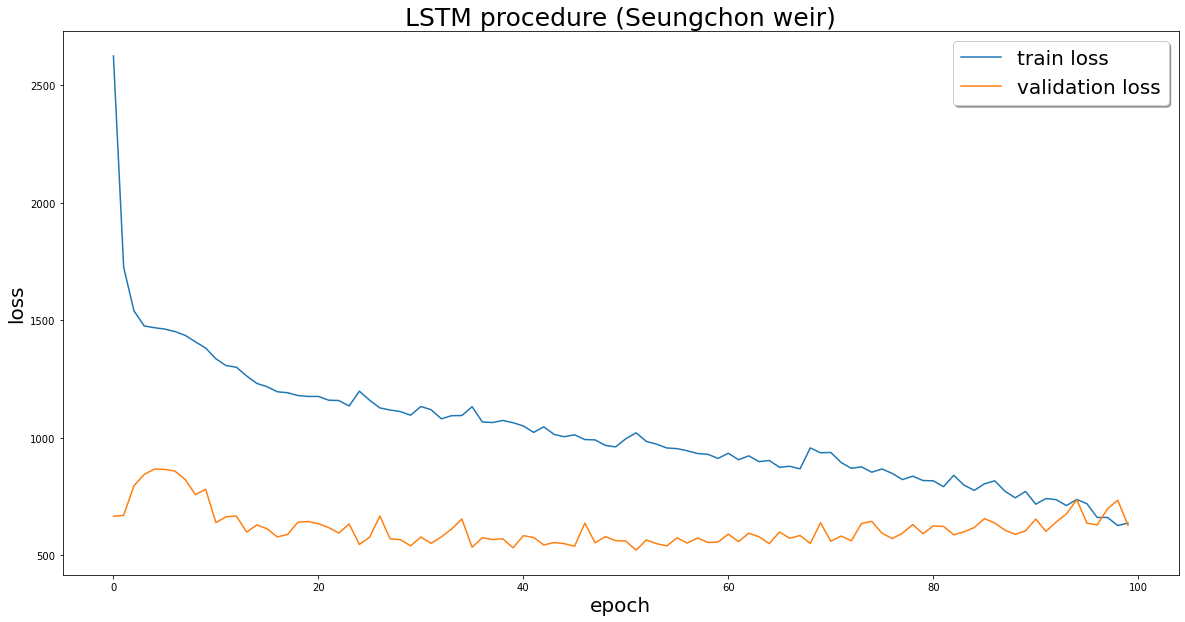

In [35]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM SC_python.png')

In [36]:
# LSTM model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
17/17 - 7s - loss: 2249.5352 - mean_squared_error: 2249.5352 - mean_absolute_error: 32.3007 - val_loss: 419.0708 - val_mean_squared_error: 419.0708 - val_mean_absolute_error: 16.1640 - 7s/epoch - 407ms/step
Epoch 2/100
17/17 - 6s - loss: 1555.9001 - mean_squared_error: 1555.9001 - mean_absolute_error: 27.0239 - val_loss: 518.5942 - val_mean_squared_error: 518.5942 - val_mean_absolute_error: 19.4056 - 6s/epoch - 329ms/step
Epoch 3/100
17/17 - 6s - loss: 1443.1689 - mean_squared_error: 1443.1689 - mean_absolute_error: 27.0687 - val_loss: 649.9596 - val_mean_squared_error: 649.9596 - val_mean_absolute_error: 22.0649 - 6s/epoch - 326ms/step
Epoch 4/100
17/17 - 5s - loss: 1424.6713 - mean_squared_error: 1424.6713 - mean_absolute_error: 27.5386 - val_loss: 693.3434 - val_mean_squared_error: 693.3434 - val_mean_absolute_error: 22.8773 - 5s/epoch - 315ms/step
Epoch 5/100
17/17 - 5s - loss: 1421.0000 - mean_squared_error: 1421.0000 - mean_absolute_error: 27.6076 - val_loss: 681.0773

Epoch 39/100
17/17 - 5s - loss: 822.6222 - mean_squared_error: 822.6222 - mean_absolute_error: 21.1720 - val_loss: 464.3583 - val_mean_squared_error: 464.3583 - val_mean_absolute_error: 15.8698 - 5s/epoch - 321ms/step
Epoch 40/100
17/17 - 5s - loss: 847.0835 - mean_squared_error: 847.0835 - mean_absolute_error: 21.7372 - val_loss: 513.5289 - val_mean_squared_error: 513.5289 - val_mean_absolute_error: 16.3434 - 5s/epoch - 301ms/step
Epoch 41/100
17/17 - 5s - loss: 795.8512 - mean_squared_error: 795.8512 - mean_absolute_error: 20.6397 - val_loss: 524.5511 - val_mean_squared_error: 524.5511 - val_mean_absolute_error: 17.2101 - 5s/epoch - 303ms/step
Epoch 42/100
17/17 - 5s - loss: 822.1516 - mean_squared_error: 822.1516 - mean_absolute_error: 21.0225 - val_loss: 478.3832 - val_mean_squared_error: 478.3832 - val_mean_absolute_error: 16.5420 - 5s/epoch - 305ms/step
Epoch 43/100
17/17 - 5s - loss: 774.5051 - mean_squared_error: 774.5051 - mean_absolute_error: 20.5973 - val_loss: 592.1935 - va

Epoch 77/100
17/17 - 5s - loss: 478.1035 - mean_squared_error: 478.1035 - mean_absolute_error: 15.8221 - val_loss: 583.2539 - val_mean_squared_error: 583.2539 - val_mean_absolute_error: 18.2479 - 5s/epoch - 287ms/step
Epoch 78/100
17/17 - 5s - loss: 451.8751 - mean_squared_error: 451.8751 - mean_absolute_error: 15.5340 - val_loss: 566.0473 - val_mean_squared_error: 566.0473 - val_mean_absolute_error: 18.0135 - 5s/epoch - 313ms/step
Epoch 79/100
17/17 - 5s - loss: 453.6839 - mean_squared_error: 453.6839 - mean_absolute_error: 15.6244 - val_loss: 586.3501 - val_mean_squared_error: 586.3501 - val_mean_absolute_error: 18.5146 - 5s/epoch - 312ms/step
Epoch 80/100
17/17 - 5s - loss: 447.9302 - mean_squared_error: 447.9302 - mean_absolute_error: 15.2976 - val_loss: 510.5938 - val_mean_squared_error: 510.5938 - val_mean_absolute_error: 17.1897 - 5s/epoch - 307ms/step
Epoch 81/100
17/17 - 5s - loss: 419.0392 - mean_squared_error: 419.0392 - mean_absolute_error: 14.7017 - val_loss: 752.7649 - va

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024)              4206592   
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4207617 (16.05 MB)
Trainable params: 4207617 (16.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 36ms/step - loss: 1375.1525 - mean_squared_error: 1375.1525 - mean_absolute_error: 29.7456
test_loss:  1375.1524658203125
test_mae:  1375.1524658203125


In [39]:
JS_test_y_pred_LSTM = model.predict(X_test_JS)
JS_test_y_pred_LSTM

2/2 [==============================] - 0s 34ms/step


array([[ 78.33202 ],
       [ 40.317207],
       [ 68.84811 ],
       [114.67194 ],
       [135.9336  ],
       [107.422615],
       [ 49.635445],
       [ 99.87908 ],
       [126.21136 ],
       [155.87343 ],
       [ 82.725204],
       [ 58.85    ],
       [ 44.050697],
       [ 44.324615],
       [106.05041 ],
       [ 75.39172 ],
       [ 73.264366],
       [ 50.00814 ],
       [ 45.48314 ],
       [ 52.24167 ],
       [ 39.84857 ],
       [ 43.280132],
       [ 43.27153 ],
       [ 32.24395 ],
       [ 10.746948],
       [ 30.604782],
       [ 67.732765],
       [ 47.241478],
       [ 49.12877 ],
       [ 23.830112],
       [ 42.79616 ],
       [ 57.507236],
       [ 26.199537],
       [ 75.54044 ],
       [ 25.500784],
       [ 29.727669],
       [ 39.440254],
       [ 16.827227],
       [ 17.408846],
       [ 40.14017 ],
       [ 31.115263],
       [ 43.66113 ],
       [ 90.070564],
       [111.22224 ],
       [ 78.304184],
       [ 57.229927],
       [ 21.356905],
       [ 49.7

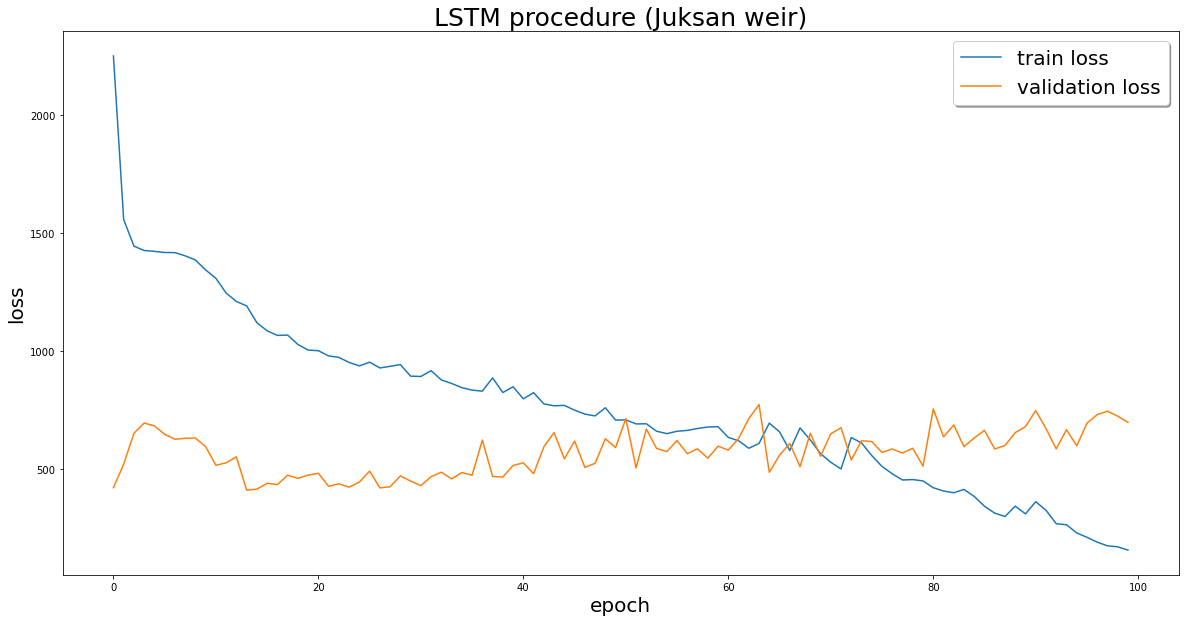

In [40]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM JS_python.png')